In [1]:
# importing all the required libraries
from PIL import Image #importing the python image library for PIL
import os,cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow.keras
from tensorflow.python.keras import utils
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,InputLayer

from scipy import misc 
from scipy.misc import imresize
from scipy.misc import imread


In [2]:
# Setting the directory path and loading the data from the train and test files
root_dir = os.path.abspath('.')
data_dir_test = './datasets/misctest'
data_dir = './datasets/misctrain'
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir_test, 'test.csv'))

In [4]:
# Setting X(feature) and target y for my model
X  = train.drop(columns ='Class' )
y = train.Class

In [5]:
# converting the target variable y to categorical one
lb = LabelEncoder()
y = lb.fit_transform(train.Class)
y = np_utils.to_categorical(y)

In [6]:
# performing train and test split for X and y 
#used stratify as I have pretty unbalanced classes
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [7]:
#checking teh shape after split
X_train.shape

(14929, 1)

In [8]:
#preprocessing for train
temp = []
for img_name in X_train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path,mode='L')
    img = imresize(img, (100, 100))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

X_train = np.stack(temp)

/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [9]:
#preprocessing for validation data
temp = []
for img_name in X_test.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path,mode='L')
    img = imresize(img, (100, 100))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

X_test = np.stack(temp)


/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [10]:
#dividing the X_train and X_test by 255
X_train = X_train / 255
X_test = X_test/255

In [12]:
# Reshaping X_train and X_test to (100,100)
X_train= X_train.reshape(X_train.shape[0],100,100,1)
X_test= X_test.reshape(X_test.shape[0],100,100,1)

In [21]:
#setting variables for modelling
input_num_units = (100, 100, 1)
hidden_num_units = 500
output_num_units = 3

epochs =20
batch_size = 128

In [37]:
#Defining the model (a normal sequential one)
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
 
  Dense(256, activation='relu'),
    
 # output layer
  Dense(units=output_num_units, activation='softmax'),
])

In [38]:
#compiling the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
#Fitting the model
history = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(X_test,y_test))

Train on 14929 samples, validate on 4977 samples
Epoch 1/20
14929/14929 [==============================] - 10s 677us/sample - loss: 0.9178 - accuracy: 0.5692 - val_loss: 0.8617 - val_accuracy: 0.5929
Epoch 2/20
14929/14929 [==============================] - 10s 690us/sample - loss: 0.8469 - accuracy: 0.6015 - val_loss: 0.8446 - val_accuracy: 0.6014
Epoch 3/20
14929/14929 [==============================] - 12s 775us/sample - loss: 0.8337 - accuracy: 0.6039 - val_loss: 0.8412 - val_accuracy: 0.6046
Epoch 4/20
14929/14929 [==============================] - 10s 689us/sample - loss: 0.8239 - accuracy: 0.6087 - val_loss: 0.8349 - val_accuracy: 0.6060
Epoch 5/20
14929/14929 [==============================] - 12s 824us/sample - loss: 0.8171 - accuracy: 0.6148 - val_loss: 0.8353 - val_accuracy: 0.6092
Epoch 6/20
14929/14929 [==============================] - 13s 902us/sample - loss: 0.8092 - accuracy: 0.6195 - val_loss: 0.8382 - val_accuracy: 0.6160
Epoch 7/20
14929/14929 [=====================

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)


plt.legend(fontsize = 18);

In [40]:
#evaluating the model on validation data
score = model.evaluate(X_test,
                               y_test,
                               verbose=0)
labels = model.metrics_names

In [41]:
score[1]

0.6437613

In [42]:
#performing preprocessing on test data
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir_test, 'Test', img_name)
    img = imread(img_path,mode='L')
    img = imresize(img, (100, 100))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [43]:
#reshaping the test data
test_x= test_x.reshape(test_x.shape[0],100,100,1)

/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


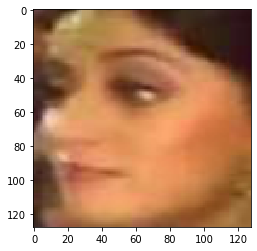

Predicted: YOUNG


In [51]:
# Checking the age prediction for test on randomly selected image
i = random.choice(test.index)
img_name = test.ID[i]

img = imread(os.path.join(data_dir_test, 'Test', img_name)).astype('float32')
img =imresize(img, (128, 128))
imgplot = plt.imshow(img)
plt.show()
# //imshow(imresize(img, (128, 128)))
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)
print(f'Predicted: {pred[i]}')
